# 뉴스 기사 데이터(news_summary_more.csv) 요약하기

In [1]:
# 데이터 다운로드
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')
data.sample(10)

,headlines,text
84561,Bumrah's front foot no-ball cancels Pak's Fakh...,Indian pacer Jasprit Bumrah had dismissed Paki...
6876,Body of 22-yr-old man found at same spot where...,The body of a 22-year-old man was found on Sun...
22562,Actor Imran gets email addressed to PTI chief ...,Actor Imran Khan has shared a screenshot of an...
58588,Hizbul chief's son injured in scuffle with Tih...,"Hizbul Mujahideen chief Syed Salahuddin's son,..."
44192,"Sonu Ke... beats Pad Man, becomes 2018Ã¢ÂÂs ...",The Luv Ranjan directorial 'Sonu Ke Titu Ki Sw...
42825,Publishing house apologises over book on Sanja...,"Juggernaut Books, while apologising over the b..."
83326,"Dhoni's wife Sakshi posts photo with Bravo, Dh...",MS Dhoni's wife Sakshi posted a picture on Ins...
75372,85% of Kaziranga National Park in Assam floode...,Nearly 85% of the Kaziranga National Park in A...
46964,"WB tribal woman gangraped, rod inserted in her...",A group of men allegedly gangraped a tribal wo...
19168,UK murder suspect jailed for not giving Facebo...,A UK man suspected of murdering a schoolgirl h...


In [2]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Matplotlib is building the font cache; this may take a moment.


In [6]:
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360


In [7]:
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


In [8]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [9]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


In [10]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [11]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [13]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [16]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = [row for row in data["text"].map(lambda x:preprocess_sentence(x, remove_stopwords=True))]

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [17]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_summary = [row for row in data["headlines"].map(lambda x:preprocess_sentence(x, remove_stopwords=False))]

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [18]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

=3


In [19]:
data = data[['Text', 'Summary']]

In [20]:
data.isnull().sum() # 전처리 후 발생한 null값을 추가로 drop

Text       0
Summary    0
dtype: int64

In [21]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98280


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10031542531542
텍스트의 길이 표준편차 : 3.7996770504942465
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.2995115995116
요약의 길이 표준편차 : 1.3899882458253108


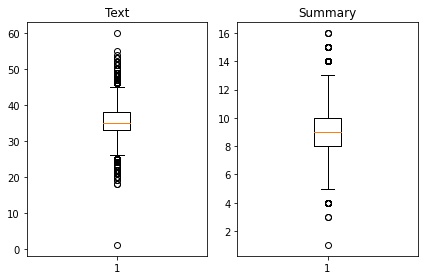

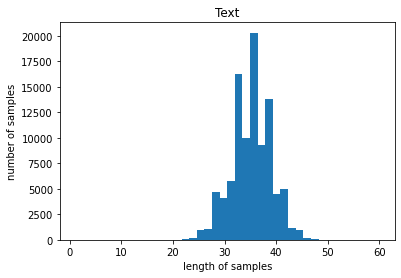

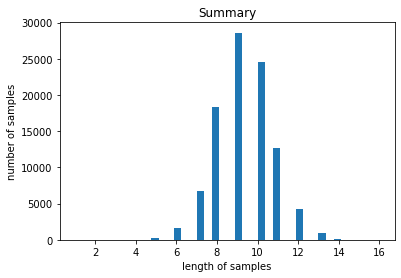

In [24]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('텍스트의 길이 표준편차 : {}'.format(np.std(text_len)))

print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))
print('요약의 길이 표준편차 : {}'.format(np.std(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [25]:
import math
text_max_len = math.ceil(np.mean(text_len)+2.5*np.std(text_len))
summary_max_len = math.ceil(np.mean(summary_len)+2.5*np.std(summary_len))
print(text_max_len, summary_max_len)

45 13


In [26]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [27]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 45 이하인 샘플의 비율: 0.9967745217745217
전체 샘플 중 길이가 13 이하인 샘플의 비율: 0.9981684981684982


In [28]:
import copy
data_copy = copy.deepcopy(data)

In [29]:
display(data_copy)

,Text,Summary
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...
...,...,...
98396,crpf jawan tuesday axed death sharp edged weap...,crpf jawan axed to death by maoists in chhatti...
98397,uff yeh first song sonakshi sinha starrer upco...,first song from sonakshi sinha noor titled uff...
98398,according reports new version science fiction ...,the matrix film to get reboot reports
98399,new music video shows rapper snoop dogg aiming...,snoop dogg aims gun at clown dressed as trump ...


In [32]:
data_head = copy.deepcopy(data_copy.head())
display(data_head)
data_condition = data_head.apply(lambda row:(len(row['Text'].split())<=40) and (len(row['Summary'].split())<=12), axis=1)
display(data_condition)
data_head = data_head[data_condition]
display(data_head)

print('샘플수 :', (len(data_head)))

,Text,Summary
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...


0     True
1    False
2     True
3     True
4    False
dtype: bool

,Text,Summary
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...


샘플수 : 3


In [33]:
data_condition = data.apply(lambda row:(len(row['Text'].split())<=text_max_len) and (len(row['Summary'].split())<=summary_max_len), axis=1)
display(data_condition)
data = data[data_condition]
display(data)

print('샘플수 :', (len(data)))

0        True
1        True
2        True
3        True
4        True
         ... 
98396    True
98397    True
98398    True
98399    True
98400    True
Length: 98280, dtype: bool

,Text,Summary
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...
...,...,...
98396,crpf jawan tuesday axed death sharp edged weap...,crpf jawan axed to death by maoists in chhatti...
98397,uff yeh first song sonakshi sinha starrer upco...,first song from sonakshi sinha noor titled uff...
98398,according reports new version science fiction ...,the matrix film to get reboot reports
98399,new music video shows rapper snoop dogg aiming...,snoop dogg aims gun at clown dressed as trump ...


샘플수 : 97783


In [34]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,kunal shah credit card bill payment platform c...,delhi techie wins free food from swiggy for on...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,speaking sexual harassment allegations rajkuma...,have known hirani for yrs what if metoo claims...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...


In [57]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [58]:
# shuffle
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[94106 60619 30788 ... 11670 64752 64618]


In [59]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [60]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19556


In [61]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78227
훈련 레이블의 개수 : 78227
테스트 데이터의 개수 : 19556
테스트 레이블의 개수 : 19556


In [62]:
# 데이터의 vocabulary
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [63]:
threshold = 8
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69498
등장 빈도가 7번 이하인 희귀 단어의 수: 48892
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 20606
단어 집합에서 희귀 단어의 비율: 70.35022590578146
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.8882907962474373


In [64]:
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 20,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [65]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[3199, 73, 1, 1606, 3991, 17, 6386, 1813, 50, 2792, 2268, 836, 699, 297, 5266, 5970, 1423, 326, 438, 1, 3199, 176, 699, 729, 2792, 172, 4328, 1646, 218, 1813, 50, 22, 1424, 1024], [1904, 195, 286, 1102, 4435, 1209, 2, 10424, 390, 373, 54, 117, 144, 787, 1417, 4401, 589, 511, 11824, 5741, 1904, 3088, 3, 3, 148, 4, 4435, 218, 1209, 390, 1904, 89, 390, 373], [1123, 3068, 192, 1924, 2360, 780, 9, 10932, 77, 8958, 17408, 275, 8958, 284, 118, 1825, 15305, 2124, 308, 8958, 19388, 205, 8525, 1123, 1, 29, 180, 1123, 298, 2125, 13769, 332, 7, 413, 11499, 837, 2530]]


In [66]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [67]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30047
등장 빈도가 5번 이하인 희귀 단어의 수: 19643
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10404
단어 집합에서 희귀 단어의 비율: 65.37424701301295
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.653035258098826


In [68]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 83, 2763, 24, 2276, 49, 4675, 3, 2764, 2669, 1556], [1, 1245, 240, 880, 4676, 1496, 4, 8], [1, 696, 3, 3254, 890, 1734, 3909, 4, 267], [1, 1077, 659, 5, 5881, 2619, 4, 430], [1, 498, 2765, 3, 976, 4162, 395, 12, 7656, 30, 1254, 3027]]
target
decoder  [[83, 2763, 24, 2276, 49, 4675, 3, 2764, 2669, 1556, 2], [1245, 240, 880, 4676, 1496, 4, 8, 2], [696, 3, 3254, 890, 1734, 3909, 4, 267, 2], [1077, 659, 5, 5881, 2619, 4, 430, 2], [498, 2765, 3, 976, 4162, 395, 12, 7656, 30, 1254, 3027, 2]]


In [69]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78227
훈련 레이블의 개수 : 78227
테스트 데이터의 개수 : 19556
테스트 레이블의 개수 : 19556


In [70]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 추상적 요약
- LSTM 기반 seq-to-seq 모델
- Attention seq-to-seq 모델

In [71]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 100
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm2(encoder_output2)


In [72]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [73]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 100)      2000000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 365568      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [74]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 100)      2000000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 256), (N 365568      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [75]:
from tensorflow import keras
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("./model/best_model.pth", save_best_only=True) 
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es, checkpoint], epochs=50)

Epoch 1/50
306/306 [==============================] - 38s 101ms/step - loss: 5.2583 - val_loss: 4.8647


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 2/50
306/306 [==============================] - 31s 100ms/step - loss: 4.6975 - val_loss: 4.4850


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 3/50
306/306 [==============================] - 31s 102ms/step - loss: 4.3826 - val_loss: 4.2697


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 4/50
306/306 [==============================] - 32s 105ms/step - loss: 4.1591 - val_loss: 4.0998


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 5/50
306/306 [==============================] - 33s 109ms/step - loss: 3.9706 - val_loss: 3.9673


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 6/50
306/306 [==============================] - 34s 110ms/step - loss: 3.8131 - val_loss: 3.8624


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 7/50
306/306 [==============================] - 33s 109ms/step - loss: 3.6781 - val_loss: 3.7819


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 8/50
306/306 [==============================] - 34s 110ms/step - loss: 3.5628 - val_loss: 3.7168


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 9/50
306/306 [==============================] - 34s 110ms/step - loss: 3.4591 - val_loss: 3.6648


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 10/50
306/306 [==============================] - 34s 110ms/step - loss: 3.3675 - val_loss: 3.6170


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 11/50
306/306 [==============================] - 34s 110ms/step - loss: 3.2861 - val_loss: 3.5861


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 12/50
306/306 [==============================] - 34s 110ms/step - loss: 3.2132 - val_loss: 3.5507


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 13/50
306/306 [==============================] - 34s 110ms/step - loss: 3.1456 - val_loss: 3.5289


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 14/50
306/306 [==============================] - 34s 110ms/step - loss: 3.0838 - val_loss: 3.5047


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 15/50
306/306 [==============================] - 34s 110ms/step - loss: 3.0232 - val_loss: 3.4910


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 16/50
306/306 [==============================] - 34s 111ms/step - loss: 2.9718 - val_loss: 3.4790


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 17/50
306/306 [==============================] - 34s 110ms/step - loss: 2.9230 - val_loss: 3.4622


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 18/50
306/306 [==============================] - 34s 110ms/step - loss: 2.8770 - val_loss: 3.4538


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 19/50
306/306 [==============================] - 34s 110ms/step - loss: 2.8338 - val_loss: 3.4434


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 20/50
306/306 [==============================] - 34s 110ms/step - loss: 2.7928 - val_loss: 3.4370


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 21/50
306/306 [==============================] - 34s 110ms/step - loss: 2.7558 - val_loss: 3.4306


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 22/50
306/306 [==============================] - 34s 111ms/step - loss: 2.7203 - val_loss: 3.4282


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 23/50
306/306 [==============================] - 34s 110ms/step - loss: 2.6863 - val_loss: 3.4261


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 24/50
306/306 [==============================] - 34s 110ms/step - loss: 2.6515 - val_loss: 3.4269
Epoch 25/50
306/306 [==============================] - 34s 110ms/step - loss: 2.6188 - val_loss: 3.4237


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 26/50
306/306 [==============================] - 34s 110ms/step - loss: 2.5893 - val_loss: 3.4191


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


INFO:tensorflow:Assets written to: ./model/best_model.pth/assets


Epoch 27/50
306/306 [==============================] - 34s 111ms/step - loss: 2.5603 - val_loss: 3.4206
Epoch 28/50
306/306 [==============================] - 34s 110ms/step - loss: 2.5327 - val_loss: 3.4229
Epoch 00028: early stopping


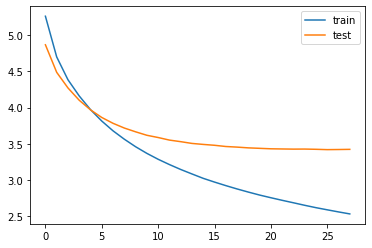

In [76]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [78]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

# 실제 결과와 요약문 비교

In [77]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

=3


In [84]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [85]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence


In [86]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0) and (i!=1):
            #print(i)
            temp = temp + tar_index_to_word[i]+' '
    return temp


In [87]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : indian rounder ravindra jadeja scored half century followed trademark sword celebration said next time would try score century celebrate two bats swords speaking partnership ravichandran ashwin said ashwin maintain pressure ends hopefully continue outside india 
실제 요약 : will try to hit ton and celebrate with two jadeja 
예측 요약 :  jadeja shares video of his sixes in ashwin


원문 : actress laxmi talking low box office collection julie said marketed sex film think people expected sex film sex added laxmi said also told film director sell sex film 
실제 요약 : julie should not have been as sex film 
예측 요약 :  was told to be part of sexual harassment in film


원문 : according details uploaded bihar government website cm nitish kumar owns assets worth lakh son nishant kumar possesses assets worth crore four times father wealth nishant assets include ancestral land residential buildings nitish movable assets worth lakh addition flat delhi valued lakh 
실제 요약 : bihar cm nitish kumar son four times

예측 요약 :  reliance jio ipo ipo ipo sebi to ipo


원문 : john isner nicolas played longest ever tennis match lasted hours five minutes june wimbledon first round match played three days saw record games played hours minute long final set longer previous longest ever tennis match 
실제 요약 : longest ever tennis match lasted for over hours 
예측 요약 :  player first to win club in st time in st time


원문 : order ensure financial technology startups leave london brexit uk government offer incentives including free networking trips potential partners united states firms british government wednesday also announced launch tech nation programme open founders early stage fintech firms 
실제 요약 : uk to retain startups with free trips to america 
예측 요약 :  visa to lay off employees to cut costs


원문 : development kerala love jihad case lawyer hadiya father said statements cannot taken face value raised concerns mental well comes hadiya recently said conversion hinduism islam forced married shafin jahan muslim

예측 요약 :  plane tries to plane plane mid air


원문 : sandra bullock anne hathaway starrer ocean released today fails work lazy storytelling lack imagination wrote hindustan times ocean lot style substance said times india firstpost wrote film little offer beyond visual rated 
실제 요약 : bullock hathaway starrer ocean hits theatres 
예측 요약 :  starrer hits the theatres


원문 : law commission india suggested linking aadhaar cards marriage registration universal tracing records commission also recommended compulsory certification marriages prevent fraudulent weddings besides suggesting window days within certification must completed time period penalty per day could imposed 
실제 요약 : law commission suggests linking aadhaar with marriage record 
예측 요약 :  govt proposes pan cards to aadhaar in aadhaar


원문 : gate feroz shah kotla stadium new delhi renamed cricketer virender sehwag honour former delhi player sehwag expected inaugurate gate october day opening india new zealand inauguration event repor

# Summa를 이용한 추출적 요약
추상적 요약에 비해 난이도가 낮고 기존 문장에서 문장을 꺼내오는 것이므로 잘못된 요약이 나올 가능성이 낮음

In [3]:
import requests
from summa.summarizer import summarize

In [4]:
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
data.drop_duplicates(subset = ['headlines'], inplace=True)
print('전체 샘플수 :', (len(data)))
print(data.isnull().sum())
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280
text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
전체 샘플수 : 98280
headlines    0
text         0
dtype: int64
전체 샘플수 : 98280
정규화 사전의 수:  120
불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',

In [5]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [6]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = [row for row in data["text"].map(lambda x:preprocess_sentence(x, remove_stopwords=True))]

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [7]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_summary = [row for row in data["headlines"].map(lambda x:preprocess_sentence(x, remove_stopwords=False))]

print("Summary 전처리 후 결과: ", clean_summary[:5])
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
data = data[['Text', 'Summary']]
data.isnull().sum() # 전처리 후 발생한 null값을 추가로 drop
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

Summary 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']
전체 샘플수 : 98280


In [258]:
for row in data[50:100]['Text']:
    print(row)

gurugram based agriculture startup origo commodities raised nearly crore funding netherlands based oikocredit triodos investment management caspian sme impact fund iv bengaluru based firm unitus capital acted exclusive financial advisor transaction founded startup provides post harvest agriculture supply chain financing logistics solutions
bengaluru based edtech startup inurture raised crore series funding round led venture capital firm ventureast startup said existing investors bertelsmann india investments ascent capital also participated round founded inurture offers undergraduate postgraduate short term corporate certification programs subjects including cloud technology
addressing event mumbai israeli pm benjamin netanyahu thursday said world loves bollywood israel loves bollywood love bollywood netanyahu also invited several bollywood personalities including imtiaz ali amitabh bachchan karan johar click selfie stating selfie taken oscars went viral netanyahu said let hundred mill

In [261]:
text = '. '.join(data['Text'][50:100].tolist())

In [262]:
text

'gurugram based agriculture startup origo commodities raised nearly crore funding netherlands based oikocredit triodos investment management caspian sme impact fund iv bengaluru based firm unitus capital acted exclusive financial advisor transaction founded startup provides post harvest agriculture supply chain financing logistics solutions. bengaluru based edtech startup inurture raised crore series funding round led venture capital firm ventureast startup said existing investors bertelsmann india investments ascent capital also participated round founded inurture offers undergraduate postgraduate short term corporate certification programs subjects including cloud technology. addressing event mumbai israeli pm benjamin netanyahu thursday said world loves bollywood israel loves bollywood love bollywood netanyahu also invited several bollywood personalities including imtiaz ali amitabh bachchan karan johar click selfie stating selfie taken oscars went viral netanyahu said let hundred m

In [263]:
summarized_text = summarize(text, split=True, ratio=0.2) #ratio=0.2(at default)

In [264]:
summarized_text

['gurugram based agriculture startup origo commodities raised nearly crore funding netherlands based oikocredit triodos investment management caspian sme impact fund iv bengaluru based firm unitus capital acted exclusive financial advisor transaction founded startup provides post harvest agriculture supply chain financing logistics solutions.',
 'bengaluru based edtech startup inurture raised crore series funding round led venture capital firm ventureast startup said existing investors bertelsmann india investments ascent capital also participated round founded inurture offers undergraduate postgraduate short term corporate certification programs subjects including cloud technology.',
 'google india vice president rajan anandan invested undisclosed sum bengaluru based online lingerie retailer buttercups intimates us based investor chandra chappadi snapdeal former chief product officer anand chandrasekaran also participated round founded arpita ganesh buttercups provides women innerwear

회고
- 추출적 요약으로 시도한 summa.summarize의 경우 라이브러리에서 중요 문장을 기반으로 중요 문장을 추출하였으며 
    길이 등의 일부 입력 옵션을 맞춰주지 않을 경우 문장 내에서 요약이 잘 되지 않는 문제가 있었음
    (데이터 특성 파악 과정을 거쳐 요약). 
- sequence 모델을 이용한 추상 요약 : 입력 옵션에 크게 신경쓰지 않고 데이터의 요약 방법을 직접 배우도록 할 수 있음